In [23]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 런타임-다시시작: 처음에 한 번만 실행하면 됩니다.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

In [2]:
%%time
url_list = []

for i in range(1,11):
  url = "https://www1.president.go.kr/petitions/best?page={}".format(i)

  response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
  soup = BeautifulSoup(response.text, "html.parser")

  for j in soup.select('div.bl_subject > a'): 
    if re.match('/[a-z].*/[0-9].*\?navigation=best',j['href']):
        url_list.append(j['href'])

CPU times: user 408 ms, sys: 18 ms, total: 426 ms
Wall time: 4.88 s


In [3]:
print(len(url_list))
url_list[:5]

150


['/petitions/596393?navigation=best',
 '/petitions/596250?navigation=best',
 '/petitions/596517?navigation=best',
 '/petitions/596292?navigation=best',
 '/petitions/596387?navigation=best']

In [4]:
url_list_1 = []

for plus_url in url_list:
  base_url = 'https://www1.president.go.kr'
  url = base_url + plus_url
  url_list_1.append(url)
  
url_list_1[:5]

['https://www1.president.go.kr/petitions/596393?navigation=best',
 'https://www1.president.go.kr/petitions/596250?navigation=best',
 'https://www1.president.go.kr/petitions/596517?navigation=best',
 'https://www1.president.go.kr/petitions/596292?navigation=best',
 'https://www1.president.go.kr/petitions/596387?navigation=best']

In [5]:
url_list = url_list_1.copy()
url_list[:5]

['https://www1.president.go.kr/petitions/596393?navigation=best',
 'https://www1.president.go.kr/petitions/596250?navigation=best',
 'https://www1.president.go.kr/petitions/596517?navigation=best',
 'https://www1.president.go.kr/petitions/596292?navigation=best',
 'https://www1.president.go.kr/petitions/596387?navigation=best']

In [6]:
url = url_list[0]
print(url)

https://www1.president.go.kr/petitions/596393?navigation=best


In [7]:
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [8]:
# 제목
soup.select('h3.petitionsView_title')[0].text

'여자배구 선수 학교폭력 사태 진상규명 및 엄정대응 촉구합니다.'

In [9]:
soup.select('span.counter')[0].text

'144,754'

In [10]:
# 참여인원
int(soup.select('span.counter')[0].text.replace(",", ""))

144754

In [11]:
# 카테고리
soup.select('ul.petitionsView_info_list > li:nth-of-type(1)')[0].text

#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > 

'카테고리문화/예술/체육/언론'

In [12]:
# 청원시작일
soup.select('ul.petitionsView_info_list > li:nth-of-type(2)')[0].text

'청원시작2021-02-12'

In [13]:
# 청원마감일
soup.select('ul.petitionsView_info_list > li:nth-of-type(3)')[0].text

'청원마감2021-03-14'

In [14]:
# 청원내용
soup.select('div.View_write')[0].text.strip()

'대한민국의 한 사람의 국민으로써 더 이상 체육계에서 일어나는 폭력과 범죄에 대해 지켜보고 있을 수 없어서 이렇게 청원합니다. 최근 배구 갤러리에 여자 프로배구선수로부터 학교폭력을 받았다고 주장하는 사람들이 나왔습니다. 하지만 구단과 배구연뱅은 이를 방관하고 KOVO는 배구연맹 차원의 조사나 징계 조차 없습니다. 이는 단순히 개인들의 문제가 아닌 우리 나라의 체육계의 신뢰와 도덕성의 문제 입니다. 야구구단 및 협회들도 최근에 학교 폭력 사실이 드러난 선수들에 대한 제명 및 지명철회 등 강력하고 당연한 조치를 행했던것 처럼 만약 여자배구선수들의 학교 폭력이 사실이면 배구연맹은 해당선수들에 대한 영구제명을 해야할것입니다. 더군다나 우리나라 배구를 대표하는 스타 선수라면 이는 더욱이 간과할 수 없는 문제입니다. 문체부를 통한 국가 차원에서의 조사가 필요하다고 사료됩니다. 더이상 우리에게 필요한것은 단순한 자유나 상징적 행동이 아닙니다. 그것은 방종에 불가합니다. 우리는 한 사람의 국민으로써 이러한 문제에 대해 같이 고민하고 실질적인 행동을 취해야할것입니다. 사과를 한다고 해도 우리나라 체육계의 국격이 손상된것은 사실이며 배구연맹과 배구선수들 전체에 대한 이미지에 손실이 되는것도 사실입니다. 단순한 개인적인 해결이 아닌 제대로된 조사와 엄정한 처벌만이 같은 문제가 발생하는것을 막을 수 있는 유일한 방법일것입니다.'

In [15]:
%%time
category_list = []
title_list = []
content_list = []
start_list = []
end_list = []
like_list = []

for url in url_list:
  response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
  soup = BeautifulSoup(response.text, "html.parser")

  category = soup.select('ul.petitionsView_info_list > li:nth-of-type(1)')[0].text[4:]
  title = soup.select('h3.petitionsView_title')[0].text
  content = soup.select('div.View_write')[0].text.strip()
  start = soup.select('ul.petitionsView_info_list > li:nth-of-type(2)')[0].text[4:]
  end = soup.select('ul.petitionsView_info_list > li:nth-of-type(3)')[0].text[4:]
  like = int(soup.select('span.counter')[0].text.replace(",", ""))

  category_list.append(category)
  title_list.append(title)
  content_list.append(content)
  start_list.append(start)
  end_list.append(end)
  like_list.append(like)

  time.sleep(0.5) 

CPU times: user 6.8 s, sys: 118 ms, total: 6.92 s
Wall time: 2min 39s


In [16]:
df = pd.DataFrame()
df["Category"] = category_list
df["Title"] = title_list
df["Content"] = content_list
df["Start"] = start_list
df["End"] = end_list
df["Like"] = like_list

df.head()

,Category,Title,Content,Start,End,Like
0,문화/예술/체육/언론,여자배구 선수 학교폭력 사태 진상규명 및 엄정대응 촉구합니다.,대한민국의 한 사람의 국민으로써 더 이상 체육계에서 일어나는 폭력과 범죄에 대해 지...,2021-02-12,2021-03-14,144754
1,기타,[20대 모텔 방치] 제 동생이 폭행당한 뒤 모텔 방에 유기되어 사망했습니다. 생전...,"동생은 작년 10월 15일, 23살 어린 나이에 함께 아르바이트를 하던 동료에게 폭...",2021-02-04,2021-03-06,107607
2,보건복지,36세 아내가 대학병원의 오진으로 사망했습니다.,아내는 첫아이를 낳고 한 번 제대로 안아보지도 못한 채 1년도 되지 않아 사망했습니...,2021-02-18,2021-03-20,62231
3,정치개혁,김명수 대법원장의 탄핵을 청원합니다,김명수 대법원장의 \r\n탄핵을 청원합니다\n\r\n임성근 부장판사\r\n사표 제출...,2021-02-08,2021-03-10,45827
4,경제민주화,비트코인은 250만원이상 과세 주식은 5000만원이상 과세 차별 하지 마세요,안녕하세요 불철주야 나라를 위해 고생하시는 공무원 분들에게\r\n묻고 싶은게 있어서...,2021-02-10,2021-03-12,41599


In [17]:
len(df)

150

In [18]:
df.to_csv("petition.csv", encoding="utf-8-sig", index=False)
df_1 = pd.read_csv("petition.csv", encoding="utf-8-sig")
df_1.head()

,Category,Title,Content,Start,End,Like
0,문화/예술/체육/언론,여자배구 선수 학교폭력 사태 진상규명 및 엄정대응 촉구합니다.,대한민국의 한 사람의 국민으로써 더 이상 체육계에서 일어나는 폭력과 범죄에 대해 지...,2021-02-12,2021-03-14,144754
1,기타,[20대 모텔 방치] 제 동생이 폭행당한 뒤 모텔 방에 유기되어 사망했습니다. 생전...,"동생은 작년 10월 15일, 23살 어린 나이에 함께 아르바이트를 하던 동료에게 폭...",2021-02-04,2021-03-06,107607
2,보건복지,36세 아내가 대학병원의 오진으로 사망했습니다.,아내는 첫아이를 낳고 한 번 제대로 안아보지도 못한 채 1년도 되지 않아 사망했습니...,2021-02-18,2021-03-20,62231
3,정치개혁,김명수 대법원장의 탄핵을 청원합니다,김명수 대법원장의 \r\n탄핵을 청원합니다\n\r\n임성근 부장판사\r\n사표 제출...,2021-02-08,2021-03-10,45827
4,경제민주화,비트코인은 250만원이상 과세 주식은 5000만원이상 과세 차별 하지 마세요,안녕하세요 불철주야 나라를 위해 고생하시는 공무원 분들에게\r\n묻고 싶은게 있어서...,2021-02-10,2021-03-12,41599


In [19]:
df_1['Category'].value_counts()

보건복지           22
교통/건축/국토       21
정치개혁           20
인권/성평등         13
문화/예술/체육/언론    11
행정             11
육아/교육          11
기타             10
반려동물            8
일자리             8
경제민주화           4
외교/통일/국방        3
안전/환경           3
농산어촌            2
성장동력            1
저출산/고령화대책       1
미래              1
Name: Category, dtype: int64

In [20]:
df_2 = df_1['Like'].groupby(df_1['Category']).sum().reset_index()
df_2 = df_2.sort_values(by="Like", ascending=False)
df_2

,Category,Like
4,문화/예술/체육/언론,230578
7,보건복지,212818
2,기타,164734
15,정치개혁,113373
1,교통/건축/국토,97739
6,반려동물,85868
0,경제민주화,64809
12,인권/성평등,63631
13,일자리,45267
16,행정,37330


In [21]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.pyplot.rc('font', family='NanumBarunGothic')

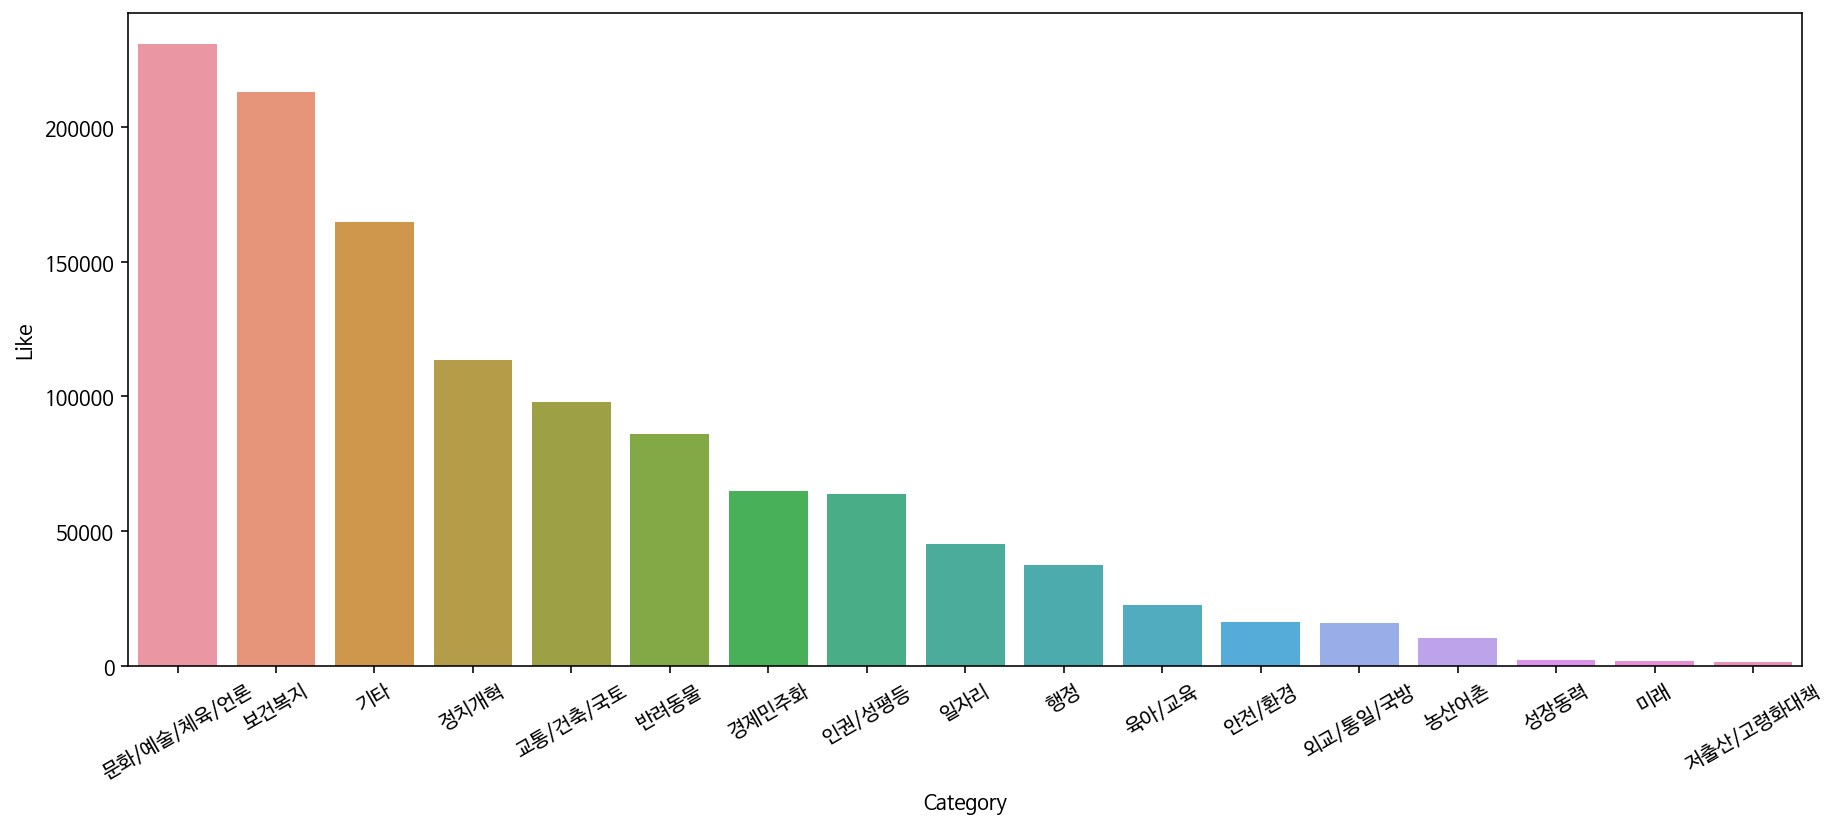

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,6))
plt.xticks(rotation = 30)
sns.barplot(x=df_2['Category'], y=df_2['Like'])

plt.show()

In [23]:
!pip install soynlp
!pip install wordcloud

     |████████████████████████████████| 419kB 23.5MB/s 


In [24]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

/usr/local/lib/python3.7/dist-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [25]:
sample_content = df_1['Content'][20]
tokenized_content = tokenizer.tokenize(sample_content)
tokenized_content[:20]

['최근',
 '울산에서',
 '제',
 '친구',
 '***',
 '양은',
 '선배들로',
 '부터',
 '여러',
 '차례',
 '집단폭행이',
 '이루어졌습니다',
 '.',
 '다문화',
 '가정',
 '학생이란',
 '이유만으로',
 '옥상',
 '건물에서',
 '평소']

In [26]:
def preprocessing(text):
  text = re.sub('[a-zA-Z0-9]', ' ', text)
  text = re.sub('\r|\n|\t', ' ', text)
  text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', ' ', text)
  return text

In [27]:
content = df_1['Content'].apply(preprocessing)
content

0      대한민국의 한 사람의 국민으로써 더 이상 체육계에서 일어나는 폭력과 범죄에 대해 지...
1      동생은 작년   월   일    살 어린 나이에 함께 아르바이트를 하던 동료에게 폭...
2      아내는 첫아이를 낳고 한 번 제대로 안아보지도 못한 채  년도 되지 않아 사망했습니...
3      김명수 대법원장의   탄핵을 청원합니다   임성근 부장판사  사표 제출에 관하여  ...
4      안녕하세요 불철주야 나라를 위해 고생하시는 공무원 분들에게  묻고 싶은게 있어서 청...
                             ...                        
145    오늘  월   일 부로 방역단계의 조정이 있었습니다   그동안 국방의 의무와 코로나...
146    심각한 인구절벽이 시작되었습니다       년 처음으로 대한민국의 인구가 전년대비 ...
147    정인이 사건으로 어린 아이  자녀들에 대한 관심도가 매우 높습니다  또한 어린이집 ...
148    해양수산부는 수산업의 균형 있는 발전을 도모하고 어업인의 경제적  사회적  문화적 ...
149    사쿠라 꽃의 향기여   대한민국 자본주의 꽃밭에는  빛 좋은 개살구 꽃이 만발하게 ...
Name: Content, Length: 150, dtype: object

In [28]:
content_tokens = content.apply(tokenizer.tokenize)
content_tokens

0      [대한민국의, 한, 사람의, 국민으로써, 더, 이상, 체육계에서, 일어나는, 폭력과...
1      [동생은, 작년, 월, 일, 살, 어린, 나이에, 함께, 아르바이트를, 하던, 동료...
2      [아내는, 첫아이를, 낳고, 한, 번, 제대로, 안아보지도, 못한, 채, 년도, 되...
3      [김명수, 대법원장의, 탄핵을, 청원합니다, 임성근, 부장판사, 사표, 제출에, 관...
4      [안녕하세요, 불철주야, 나라를, 위해, 고생하시는, 공무원, 분들에게, 묻고, 싶...
                             ...                        
145    [오늘, 월, 일, 부로, 방역단계의, 조정이, 있었습니다, 그동안, 국방의, 의무...
146    [심각한, 인구절벽이, 시작되었습니다, 년, 처음으로, 대한민국의, 인구가, 전년대...
147    [정인이, 사건으로, 어린, 아이, 자녀들에, 대한, 관심도가, 매우, 높습니다, ...
148    [해양수산부는, 수산업의, 균형, 있는, 발전을, 도모하고, 어업인의, 경제적, 사...
149    [사쿠라, 꽃의, 향기여, 대한민국, 자본주의, 꽃밭에는, 빛, 좋은, 개살구, 꽃...
Name: Content, Length: 150, dtype: object

In [29]:
# flatten
content_tokens = sum(content_tokens, [])
content_tokens[:5]

['대한민국의', '한', '사람의', '국민으로써', '더']

In [30]:
stopwords = [""]

In [31]:
from wordcloud import WordCloud

def displayWordCloud(data = None, backgroundcolor='white', width=800, height=400):
  wordcloud = WordCloud(
      font_path = fontpath,
      stopwords = stopwords,
      background_color = backgroundcolor,
      collocations = False,
      width = width, height = height).generate(data)
  plt.figure(figsize = (15,8))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

In [32]:
from soynlp.noun import LRNounExtractor

noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(content_tokens)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (5700, 2846) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 1602 nouns are extracted


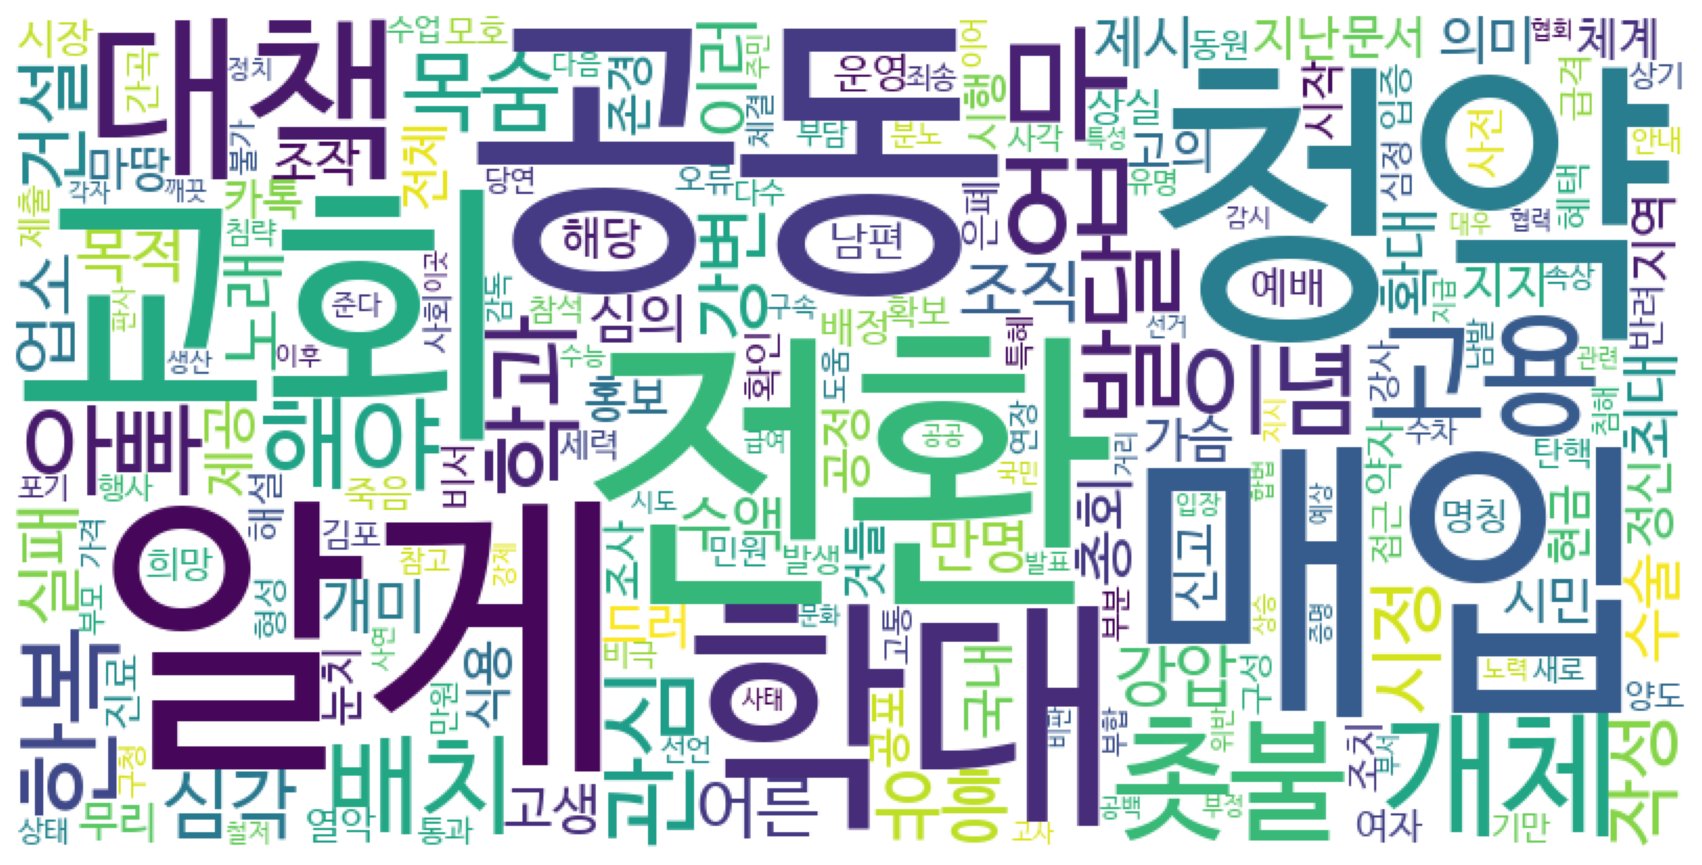

In [33]:
displayWordCloud(' '.join(nouns))